In [67]:
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from keras import layers
import keras
import numpy as np

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

from numpy.random import seed
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

def create_sequences(values, time_steps=128):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

selected = []
data_train = []
losses = []
losses_evaluate = []
for t in range(1, 20):
    for i in range(1,t+1):
        selected.append((60-1) * (i-1) + 1 )

    data_train = []
    for cid in range(34):
        data = pd.read_csv(f'/home/gabrieltalasso/IoT_Anomaly_Detection/data/SKAB/federated_data/{cid}.csv', sep = ';')
        scaler = StandardScaler()
        data = data.head(t* 60)

        data.index = pd.to_datetime(data['datetime'])
        data.drop('datetime', axis = 1, inplace=True)
        train = data.copy()
        train.drop(['anomaly', 'changepoint'], axis = 1, inplace = True)
        train = train.values
        scaler.fit(train)
        train = scaler.transform(train)

        pca = PCA(n_components=2)
        train = pca.fit_transform(train)

        X = create_sequences(train, time_steps=59)
        for s in selected:
            x = X[s]
            data_train.append(x)
    #data_train = np.stack(data_train, axis = 1)#.squeeze(axis = 0)
    data_train = np.array(data_train)
    print(data_train.shape)
    X = data_train.copy()

    if t == 1:
        model = keras.Sequential(
                    [
                        layers.Input(shape=(X.shape[1], X.shape[2])),#, X.shape[3])),

                        #layers.Dropout(rate=0.2),
                        layers.Conv1D(
                            filters=32, kernel_size=7, padding="same", strides=1, activation="relu"
                        ),

                        # layers.Dropout(rate=0.2),
                        layers.Conv1D(
                            filters=16, kernel_size=7, padding="same", strides=1, activation="relu"
                        ),
                        #layers.Conv1D(
                        #    filters=8, kernel_size=7, padding="same", strides=1, activation="relu"
                        #),
                        #layers.Conv1DTranspose(
                        #    filters=8, kernel_size=7, padding="same", strides=1, activation="relu"
                        #),

                        layers.Conv1DTranspose(
                            filters=16, kernel_size=7, padding="same", strides=1, activation="relu"
                        ),

                        layers.Conv1DTranspose(
                            filters=32, kernel_size=7, padding="same", strides=1, activation="relu"
                        ),
                        layers.Conv1DTranspose(
                            filters=1, kernel_size=1, padding="same"),

                        #layers.Dense(X.shape[2])
                    ]
                    )
    model.compile(optimizer='adam', loss='mse')

    n_epochs = 100
    hist =  model.fit(X, X,
                epochs = n_epochs, batch_size = 32, verbose=0)
        
    losses.append(hist.history['loss'][-1])
    losses_evaluate.append(pd.Series(np.sum(np.mean(np.abs(X[:34] - model.predict(X[:34])), axis=1), axis=1)).values[0]
    )

#model.save_weights('./checkpoints/my_checkpoint_PCA')


(34, 59, 2)
2/2 [==============================] - 0s 8ms/step
(102, 59, 2)
2/2 [==============================] - 0s 8ms/step
(204, 59, 2)
2/2 [==============================] - 0s 7ms/step
(340, 59, 2)


KeyboardInterrupt: 

<AxesSubplot:>

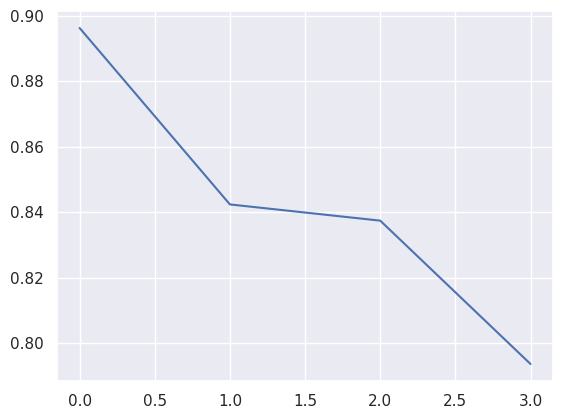

In [66]:
sns.lineplot(losses)

In [ ]:
X.shape

(19, 59, 2)